# Heart Disease Project
In this project, we import a data from a CSV file and perform simple calculations.

In [33]:
# Importing libraries
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

# Loading csv file into a dataframe
data = pd.read_csv("./data/heart-disease.csv");

## Data exploration and cleaning
The data we loaded is a dataset containing information about patients heart history. Each row in the dataset represents one patient and each column represents a different variable. Here is a brief description of each column:

- age: The age of the patient in years.
- sex: The sex of the patient (0 = female, 1 = male).
- cp: The type of chest pain experienced by the patient (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).
- trestbps: The resting blood pressure of the patient in mm Hg.
- chol: The serum cholesterol level of the patient in mg/dL.
- fbs: The fasting blood sugar level of the patient (0 = <120 mg/dL, 1 = >=120 mg/dL).
- restecg: The resting electrocardiographic results of the patient (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
- thalach: The maximum heart rate achieved by the patient during exercise.
- exang: Whether or not the patient has exercise-induced angina (0 = no, 1 = yes).
- oldpeak: ST depression induced by exercise relative to rest.
- slope: The slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
- ca: The number of major vessels (0-3) colored by fluoroscopy.
- thal: A blood disorder called thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect).
- target: Whether or not the patient has heart disease (0 = no, 1 = yes).

In [10]:
# Random data from the csv file to audit the quality.
print(data.sample(n=5));

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
168   63    1   0       130   254    0        0      147      0      1.4   
9     57    1   2       150   168    0        1      174      0      1.6   
72    29    1   1       130   204    0        0      202      0      0.0   
116   41    1   2       130   214    0        0      168      0      2.0   
85    67    0   2       115   564    0        0      160      0      1.6   

     slope  ca  thal  target  
168      1   1     3       0  
9        2   0     2       1  
72       2   0     2       1  
116      1   0     2       1  
85       1   0     3       1  


In [16]:
# Printing the data type of each of our variables (columns)
print(data.dtypes);

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [20]:
# Check for missing values
print(data.isnull());

       age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
0    False  False  False     False  False  False    False    False  False   
1    False  False  False     False  False  False    False    False  False   
2    False  False  False     False  False  False    False    False  False   
3    False  False  False     False  False  False    False    False  False   
4    False  False  False     False  False  False    False    False  False   
..     ...    ...    ...       ...    ...    ...      ...      ...    ...   
298  False  False  False     False  False  False    False    False  False   
299  False  False  False     False  False  False    False    False  False   
300  False  False  False     False  False  False    False    False  False   
301  False  False  False     False  False  False    False    False  False   
302  False  False  False     False  False  False    False    False  False   

     oldpeak  slope     ca   thal  target  
0      False  False  False  Fal

In [22]:
# Check for duplicates
print(data.duplicated());

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool


## Data analysis
The data looks pretty clean so far. Let's do some basic data analysis. 

### Summary Stats
Let's calculate mean, count, standard deviation, minimum value, 25th percentile, median, 75th percentile, and maximum value.

In [40]:
# Calculate summary statistics for each column.
print(data.describe());

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

### Correlations
Let's calculate correlations between columns using the corr() method. This will calculate the pairwise correlations between all numeric columns in the DataFrame and create a correlation matrix. The output will be a square matrix where each cell represents the correlation between two columns. The diagonal cells will be 1, to represent the correlations between pairs of columns. The values in the correlation matrix range from -1 to 1, where -1 represents a perfectly negative correlation, 0 represents no correlation, and 1 represents a perfectly positive correlation.

In [41]:
correlations = data.corr();
print(correlations);

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

#### Correlation matrix heatmap
We can visualize the correlation matrix as a heatmap using the heatmap() function from the seaborn library. This shows the pairwise correlations between all numeric columns in the DataFrame. The cells with higher absolute correlation values will be darker in color.

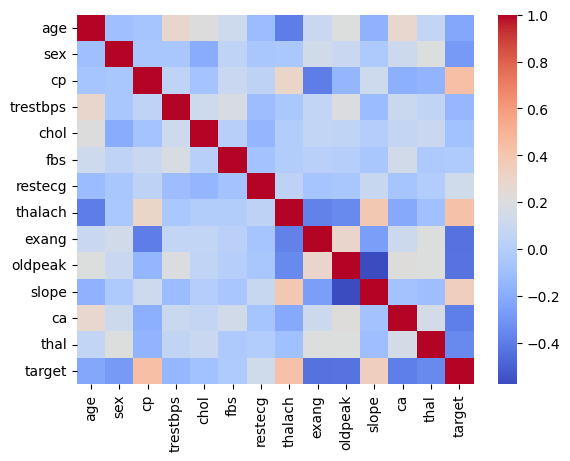

In [42]:
# Visualize the correlation matrix as a heatmap
sns.heatmap(correlations, cmap='coolwarm');
plt.show();

### Calculate summary statistics for each group
We will now group the data by one or more columns and calculate summary statistics for each group using the groupby() method. This will group the data by the sex column (which has values of 0 for female and 1 for male) and calculate summary statistics for each group using the describe() method of the DataFrame. The output will be a DataFrame that shows the summary statistics for each group.

In [44]:
# Group the data by sex and calculate summary statistics for each group
grouped_data = data.groupby('sex').describe()

# Print the summary statistics for male patients
print(grouped_data.loc[1])

# Print the summary statistics for female patients
print(grouped_data.loc[0])

age     count    207.000000
        mean      53.758454
        std        8.883803
        min       29.000000
        25%       47.000000
                    ...    
target  min        0.000000
        25%        0.000000
        50%        0.000000
        75%        1.000000
        max        1.000000
Name: 1, Length: 104, dtype: float64
age     count    96.000000
        mean     55.677083
        std       9.409396
        min      34.000000
        25%      49.750000
                   ...    
target  min       0.000000
        25%       0.750000
        50%       1.000000
        75%       1.000000
        max       1.000000
Name: 0, Length: 104, dtype: float64


### Scatter plot
To visualize the relationship between two numeric variables (e.g., age and cholesterol), you can create a scatter plot using the scatter() function from the matplotlib library. This will create a scatter plot that shows the relationship between age and cholesterol.

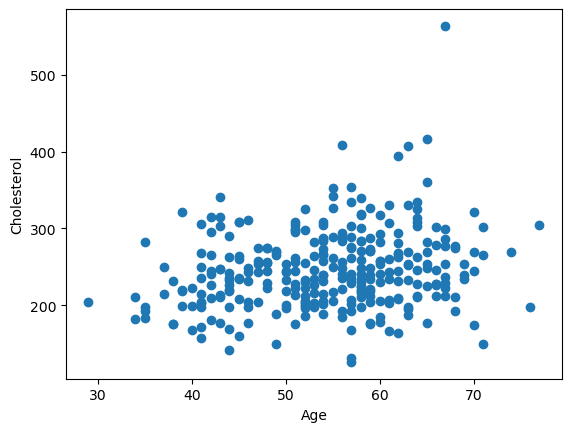

In [46]:
# Create a scatter plot of age vs. cholesterol
plt.scatter(data['age'], data['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

### Bar chart
To visualize the distribution of a categorical variable (e.g., the type of chest pain), you can create a bar chart using the bar() function